In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

import copy 
import tensorflow as tf 
from sklearn.linear_model import LinearRegression





2023-12-24 19:46:09.035010: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]


In [3]:
df = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape').drop(["Date", "Holiday", "Seasons"], axis=1)

In [4]:
df.columns = dataset_cols
df.head()
df["functional"] = (df['functional'] == "yes").astype("int")

In [5]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0


In [6]:
df = df[df["hour" ]== 12]  # Simplifing model iat noon only

In [7]:
df

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8652,752,12,9.1,57,1.1,562,1.0,1.69,0.0,0.0,0
8676,672,12,9.3,61,1.5,390,2.1,0.85,0.0,0.0,0
8700,635,12,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,0
8724,661,12,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,0


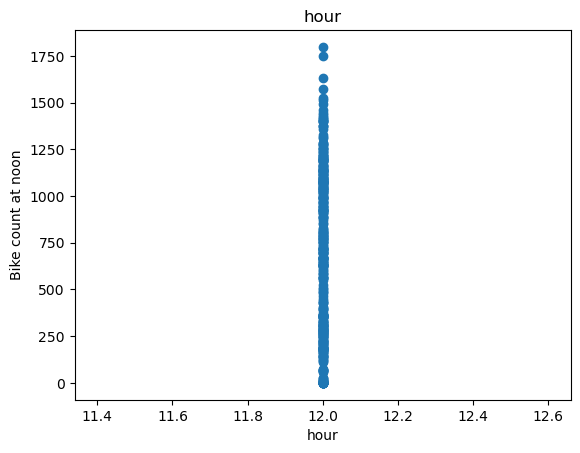

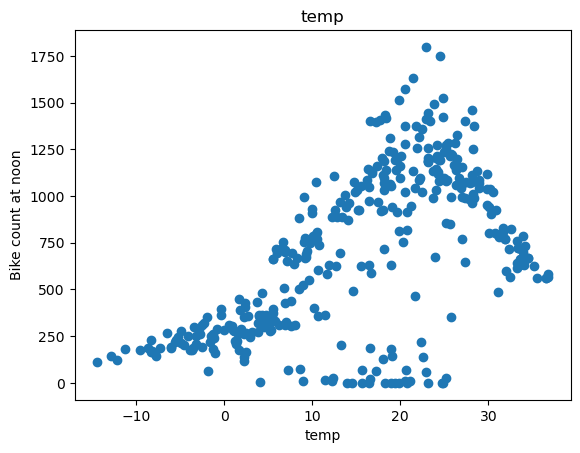

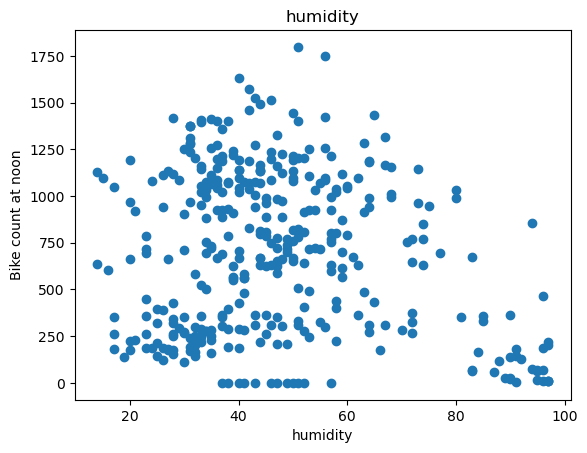

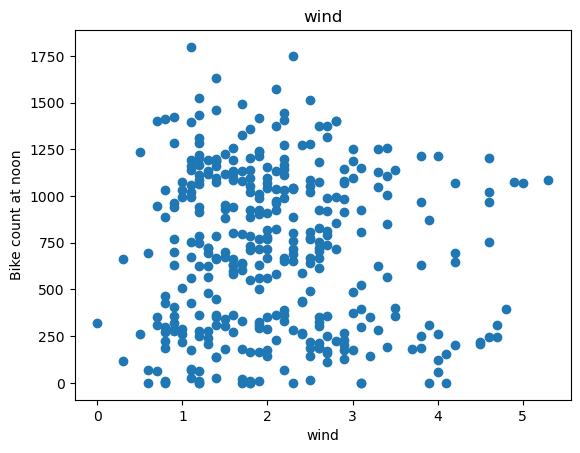

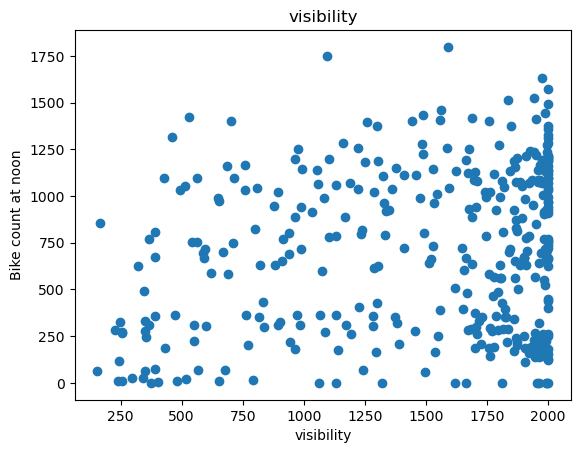

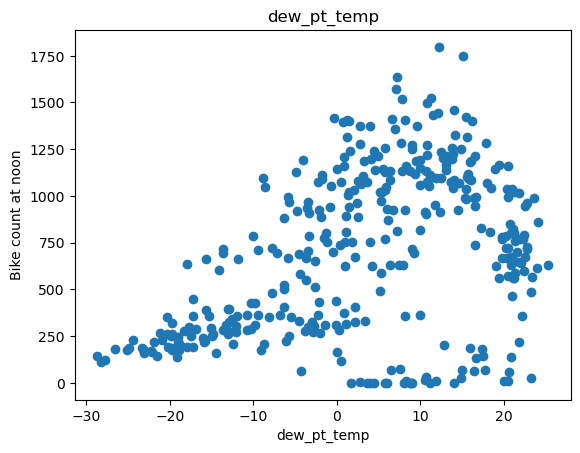

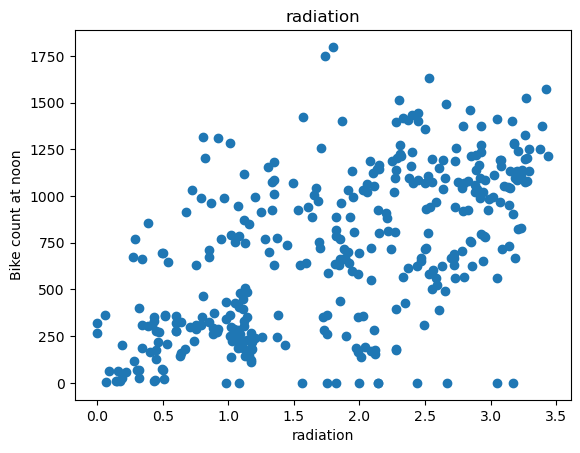

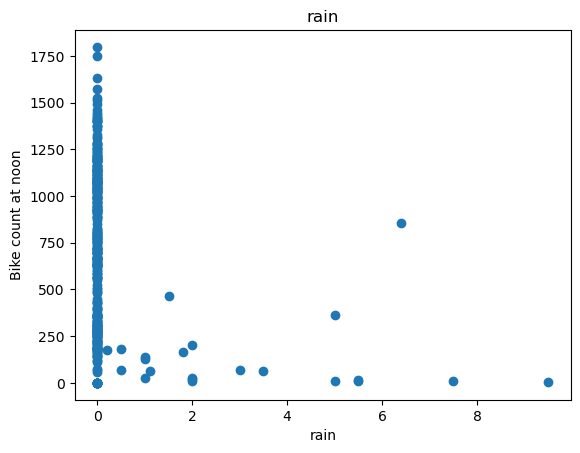

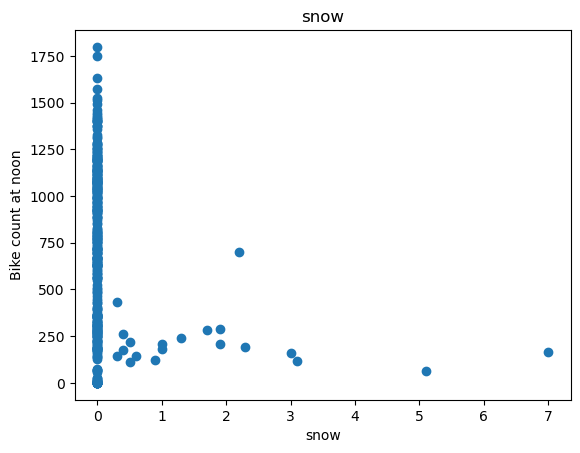

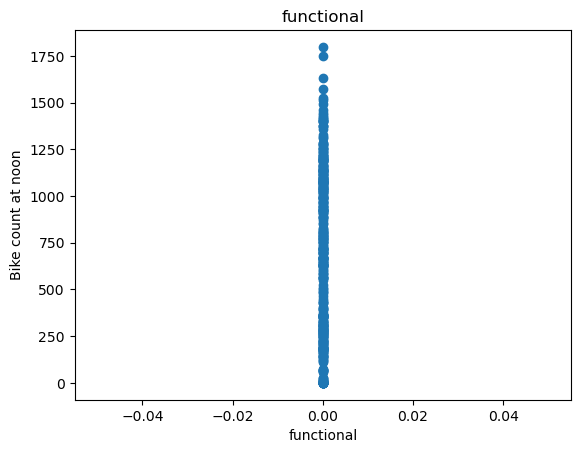

In [8]:
for label in df.columns[1:]:
    plt.scatter(df[label],df["bike_count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike count at noon")
    plt.show()

array([[<Axes: title={'center': 'bike_count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'dew_pt_temp'}>,
        <Axes: title={'center': 'radiation'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'snow'}>,
        <Axes: title={'center': 'functional'}>, <Axes: >]], dtype=object)

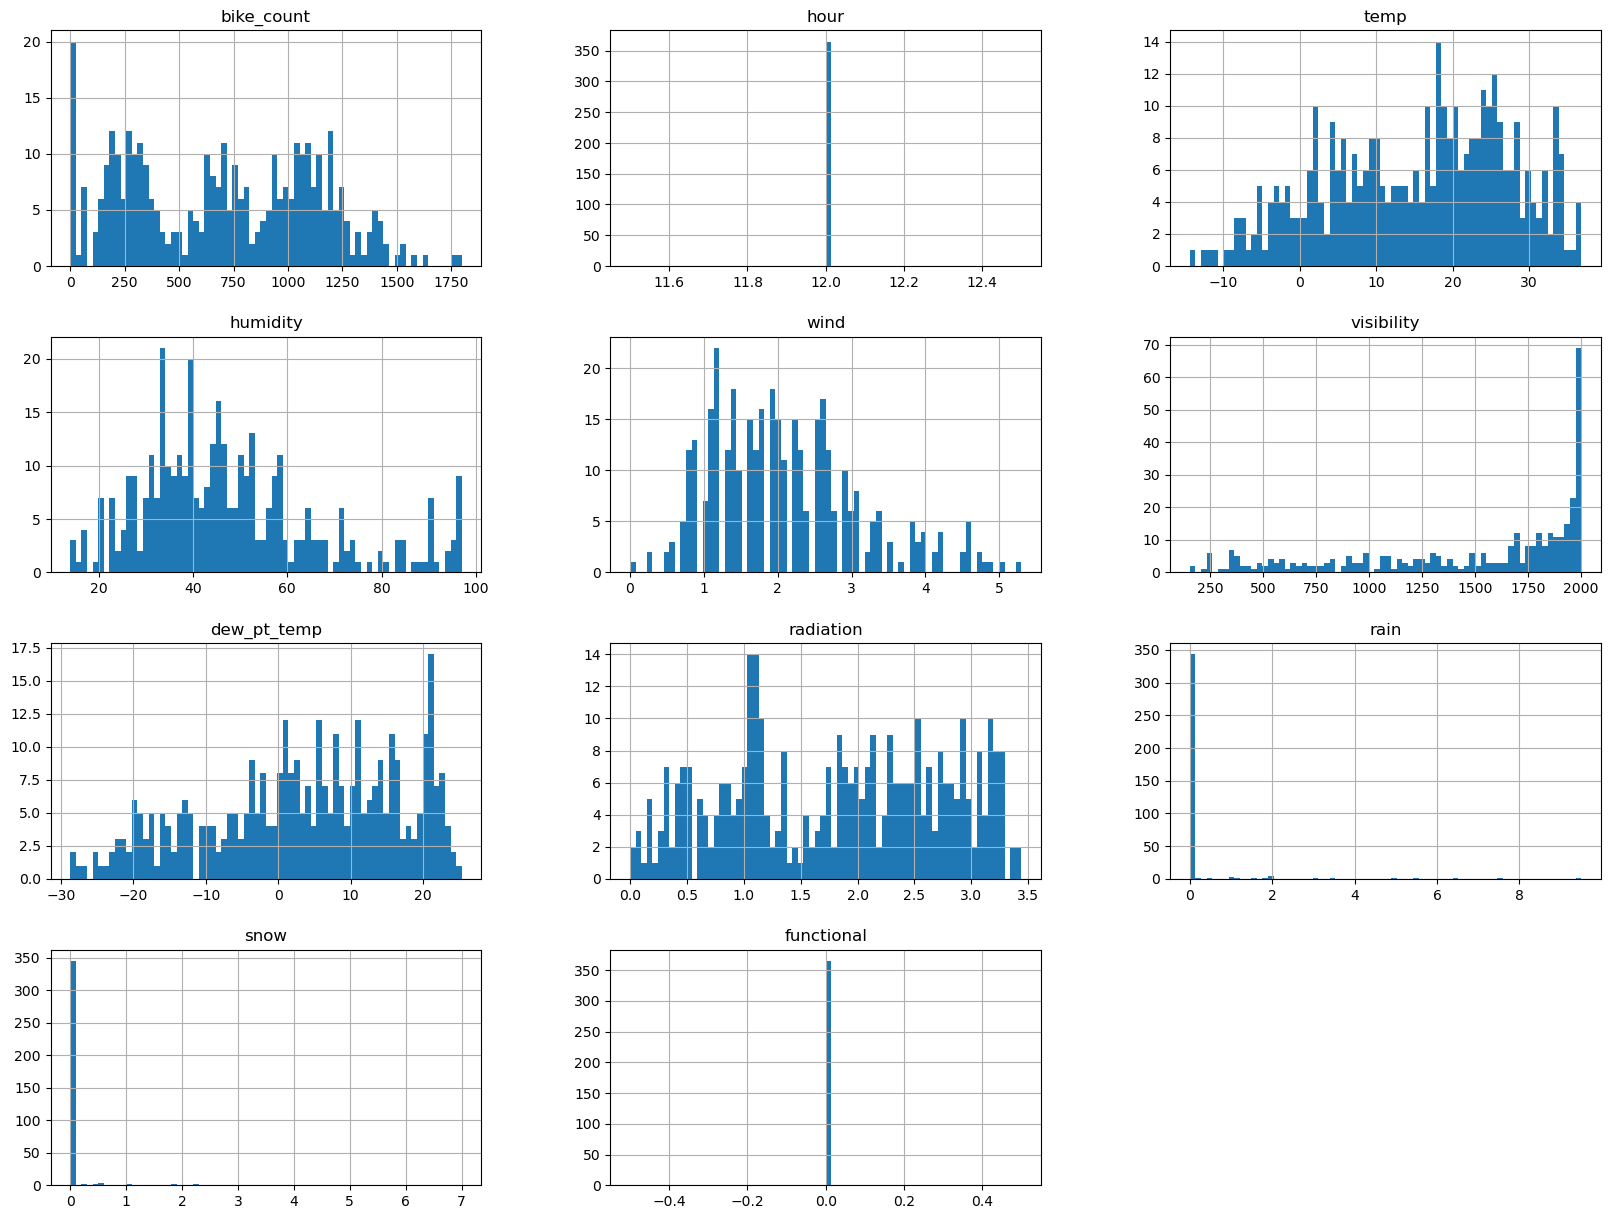

In [10]:
df.hist(bins=70,figsize=(20,15))

In [11]:
df = df.drop(["wind","visibility","functional"],axis=1)


In [12]:
#Train Validation and Test

train, val, test = np.split( df.sample(frac=1), [ int(0.6*len(df)) , int(0.8*len(df)) ])

/home/ashwin/.conda/envs/ml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:

def get_xy(df, y_label,x_label=None):
    df = copy.deepcopy(df)
    if not x_label:
        X = df[ [c for c in df.columns if c!=y_label]].values
    else:
        if len(x_label)==1:
            X=df[x_label[0]].values.reshape(-1,1)
        else:
            X = df[x_label].values
    y = df[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data,X,y

In [14]:
_, x_train_temp, y_train_temp = get_xy(train,"bike_count",x_label=["temp"])
_, x_val_temp, y_val_temp = get_xy(val,"bike_count",x_label=["temp"])
_, x_test_temp, y_test_temp = get_xy(test,"bike_count",x_label=["temp"])

In [15]:
temp_reg = LinearRegression()

In [16]:
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [17]:
temp_reg.score(x_test_temp,y_test_temp)

0.2438859377387741

2023-12-24 19:46:51.003438: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


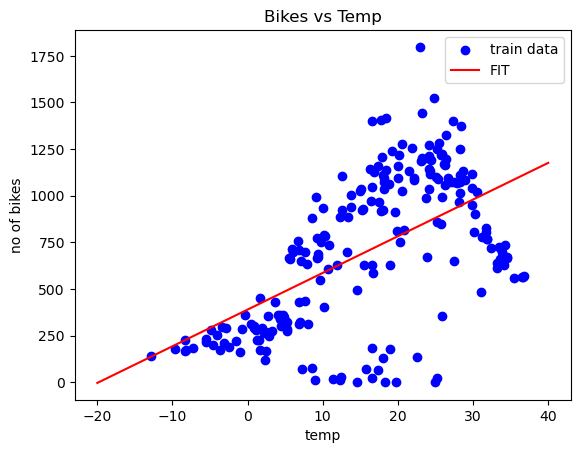

In [18]:
plt.scatter(x_train_temp,y_train_temp,label = "train data", color = "blue")

x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label= "FIT" , color="red" )
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("no of bikes")
plt.xlabel("temp")
plt.show()

In [19]:
print(x)

tf.Tensor(
[-20.         -19.39393939 -18.78787879 -18.18181818 -17.57575758
 -16.96969697 -16.36363636 -15.75757576 -15.15151515 -14.54545455
 -13.93939394 -13.33333333 -12.72727273 -12.12121212 -11.51515152
 -10.90909091 -10.3030303   -9.6969697   -9.09090909  -8.48484848
  -7.87878788  -7.27272727  -6.66666667  -6.06060606  -5.45454545
  -4.84848485  -4.24242424  -3.63636364  -3.03030303  -2.42424242
  -1.81818182  -1.21212121  -0.60606061   0.           0.60606061
   1.21212121   1.81818182   2.42424242   3.03030303   3.63636364
   4.24242424   4.84848485   5.45454545   6.06060606   6.66666667
   7.27272727   7.87878788   8.48484848   9.09090909   9.6969697
  10.3030303   10.90909091  11.51515152  12.12121212  12.72727273
  13.33333333  13.93939394  14.54545455  15.15151515  15.75757576
  16.36363636  16.96969697  17.57575758  18.18181818  18.78787879
  19.39393939  20.          20.60606061  21.21212121  21.81818182
  22.42424242  23.03030303  23.63636364  24.24242424  24.84848485


In [20]:
print(np.array(x).reshape(-1,1))

[[-20.        ]
 [-19.39393939]
 [-18.78787879]
 [-18.18181818]
 [-17.57575758]
 [-16.96969697]
 [-16.36363636]
 [-15.75757576]
 [-15.15151515]
 [-14.54545455]
 [-13.93939394]
 [-13.33333333]
 [-12.72727273]
 [-12.12121212]
 [-11.51515152]
 [-10.90909091]
 [-10.3030303 ]
 [ -9.6969697 ]
 [ -9.09090909]
 [ -8.48484848]
 [ -7.87878788]
 [ -7.27272727]
 [ -6.66666667]
 [ -6.06060606]
 [ -5.45454545]
 [ -4.84848485]
 [ -4.24242424]
 [ -3.63636364]
 [ -3.03030303]
 [ -2.42424242]
 [ -1.81818182]
 [ -1.21212121]
 [ -0.60606061]
 [  0.        ]
 [  0.60606061]
 [  1.21212121]
 [  1.81818182]
 [  2.42424242]
 [  3.03030303]
 [  3.63636364]
 [  4.24242424]
 [  4.84848485]
 [  5.45454545]
 [  6.06060606]
 [  6.66666667]
 [  7.27272727]
 [  7.87878788]
 [  8.48484848]
 [  9.09090909]
 [  9.6969697 ]
 [ 10.3030303 ]
 [ 10.90909091]
 [ 11.51515152]
 [ 12.12121212]
 [ 12.72727273]
 [ 13.33333333]
 [ 13.93939394]
 [ 14.54545455]
 [ 15.15151515]
 [ 15.75757576]
 [ 16.36363636]
 [ 16.96969697]
 [ 17.57

# Multiple Linear regrassion for all the dataset

In [21]:
def get_xy(df, y_label,x_label=None):
    df = copy.deepcopy(df)
    if x_label is None:
        X = df[ [c for c in df.columns if c!=y_label]].values
    else:
        if len(x_label)==1:
            X=df[x_label[0]].values.reshape(-1,1)
        else:
            X = df[x_label].values
    y = df[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data,X,y

In [22]:
_, x_train_all, y_train_all = get_xy(train,"bike_count",x_label=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val,"bike_count",x_label=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test,"bike_count",x_label=df.columns[1:])

In [23]:
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [24]:
all_reg.score(x_test_all,y_test_all)

0.26476128920614006

# Regrassion with Neural Net

In [106]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,1) , axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1,1))

In [107]:
temp_nn_model = tf.keras.Sequential(
    [temp_normalizer,
    tf.keras.layers.Dense(1)
    ])

In [108]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [109]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1,1),y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp,y_val_temp)
)

In [110]:
def plot_loss(hist):
    plt.plot(hist.history["loss"] ,label = "loss", color = "blue")
    plt.plot(hist.history["val_loss"] ,label = "val_loss", color = "red")

    plt.legend()
    plt.title("Bikes vs Temp")
    plt.ylabel("MSE")
    plt.xlabel("Epoch")
    plt.grid(True)
    plt.show()

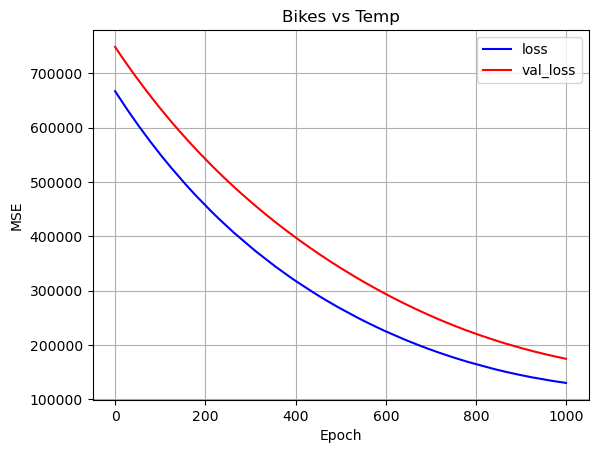

In [97]:
plot_loss(history)

4/4 [==============================] - 0s 1ms/step


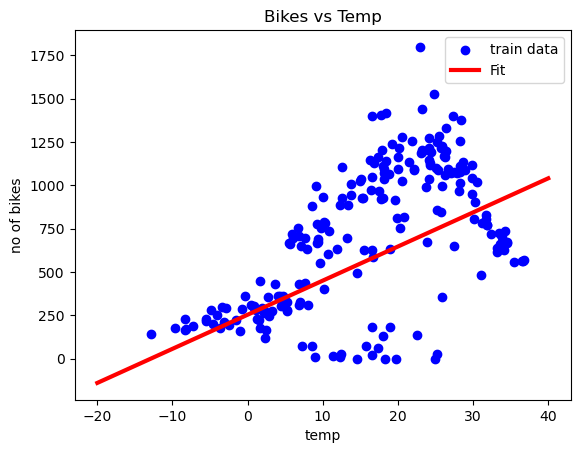

In [117]:
plt.scatter(x_train_temp,y_train_temp,label = "train data", color = "blue")

x = tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)

plt.title("Bikes vs Temp")
plt.ylabel("no of bikes")
plt.xlabel("temp")
plt.legend()
plt.show()

# Regression with multiple layer


In [141]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,) , axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1,))

temp_nn_model_multilayer = tf.keras.Sequential(
    
    [temp_normalizer,
     tf.keras.layers.Dense(32, activation = "relu"),
     tf.keras.layers.Dense(32, activation = "relu"),
     tf.keras.layers.Dropout(0.1),
     tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(1)
    ])
temp_nn_model_multilayer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error' )

In [142]:
history = temp_nn_model_multilayer.fit(x_train_temp,y_train_temp,validation_data=(x_val_temp,y_val_temp),epochs=100,verbose=0)

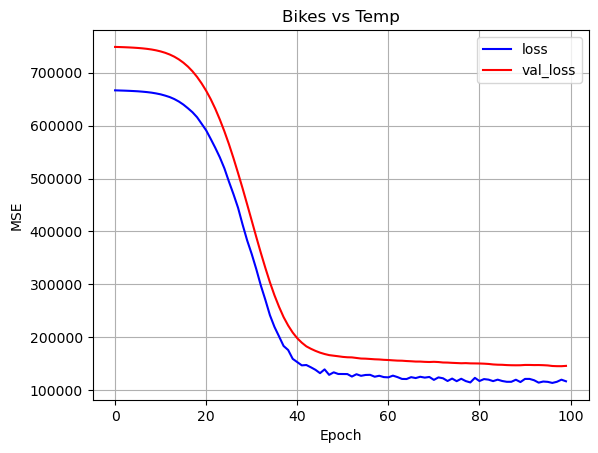

In [143]:
plot_loss(history)

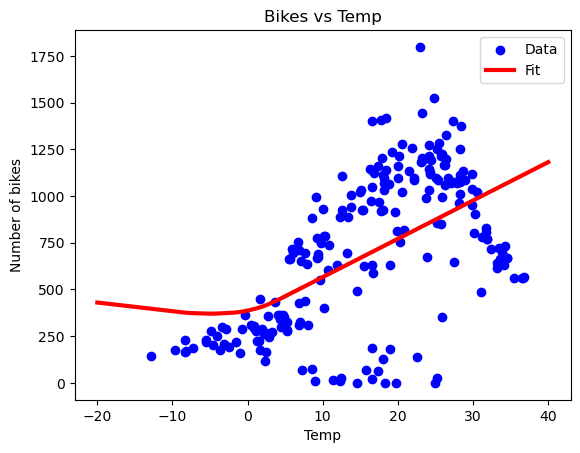

In [145]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)

plt.plot(x,temp_nn_model_multilayer(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3 )
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [146]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(7,), axis=-1)
all_normalizer.adapt(x_train_all)

In [147]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [148]:
history = nn_model.fit(
    x_train_all, y_train_all,
    validation_data=(x_val_all, y_val_all),
    verbose=0, epochs=100
)

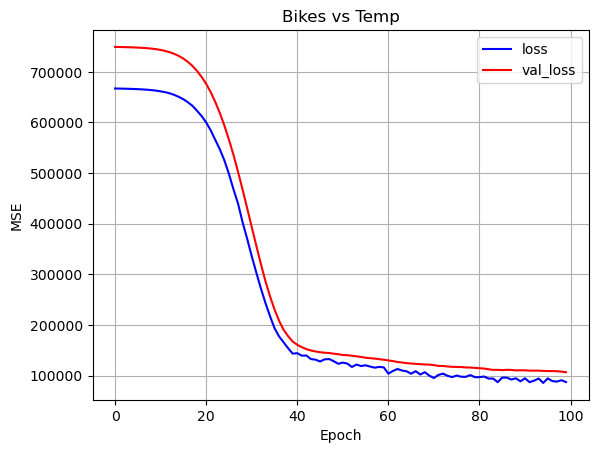

In [149]:
plot_loss(history)

In [152]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

3/3 [==============================] - 0s 2ms/step


In [153]:
MSE(y_pred_lr, y_test_all)

143709.38203135823

In [154]:
MSE(y_pred_nn, y_test_all)

148239.55777994436

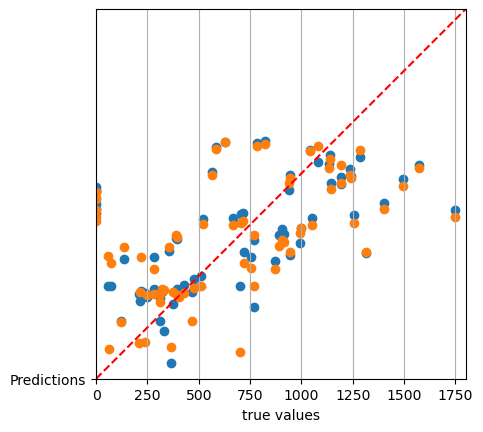

In [162]:
plt.axes(aspect="equal")
plt.scatter(y_test_all,y_pred_lr, label="linear regration pred")
plt.scatter(y_test_all,y_pred_nn, label="NN pred")

plt.xlabel('true values')
plt.plot("Predictions")
plt.grid(True)

lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,"--r")
plt.show()